In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, auc, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE

%matplotlib inline

In [2]:
data = pd.read_csv("breast-cancer.csv")

In [3]:
data.isna().sum()

age            0
menopause      0
tumor_size     0
inv_nodes      0
node_caps      8
deg_malig      0
breast         0
breast_quad    1
irradiat       0
class          0
dtype: int64

In [4]:
data.head()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [5]:
data.info

<bound method DataFrame.info of          age  menopause tumor_size inv_nodes node_caps deg_malig   breast  \
0    '40-49'  'premeno'    '15-19'     '0-2'     'yes'       '3'  'right'   
1    '50-59'     'ge40'    '15-19'     '0-2'      'no'       '1'  'right'   
2    '50-59'     'ge40'    '35-39'     '0-2'      'no'       '2'   'left'   
3    '40-49'  'premeno'    '35-39'     '0-2'     'yes'       '3'  'right'   
4    '40-49'  'premeno'    '30-34'     '3-5'     'yes'       '2'   'left'   
..       ...        ...        ...       ...       ...       ...      ...   
281  '50-59'     'ge40'    '30-34'     '6-8'     'yes'       '2'   'left'   
282  '50-59'  'premeno'    '25-29'     '3-5'     'yes'       '2'   'left'   
283  '30-39'  'premeno'    '30-34'     '6-8'     'yes'       '2'  'right'   
284  '50-59'  'premeno'    '15-19'     '0-2'      'no'       '2'  'right'   
285  '50-59'     'ge40'    '40-44'     '0-2'      'no'       '3'   'left'   

    breast_quad irradiat                   

In [6]:
data["age"] = data["age"].str.replace("'", "")

In [7]:
data["menopause"] = data["menopause"].str.replace("'", "")

In [8]:
data["tumor_size"] = data["tumor_size"].str.replace("'", "")

In [9]:
data["inv_nodes"] = data["inv_nodes"].str.replace("'", "")

In [10]:
data["node_caps"] = data["node_caps"].str.replace("'", "")

In [11]:
data["deg_malig"] = data["deg_malig"].str.replace("'", "")

In [12]:
data["breast"] = data["breast"].str.replace("'", "")

In [13]:
data["breast_quad"] = data["breast_quad"].str.replace("'", "")

In [14]:
data["irradiat"] = data["irradiat"].str.replace("'", "")

In [15]:
data["class"] = data["class"].str.replace("'", "")

In [16]:
data.tail()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,class
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events
285,50-59,ge40,40-44,0-2,no,3,left,right_up,no,no-recurrence-events


In [17]:
data.isnull().any()

age            False
menopause      False
tumor_size     False
inv_nodes      False
node_caps       True
deg_malig      False
breast         False
breast_quad     True
irradiat       False
class          False
dtype: bool

In [18]:
data[data.isnull().any(axis = 1)]

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,class
20,50-59,lt40,20-24,0-2,NaN,1,left,left_low,no,recurrence-events
31,60-69,ge40,25-29,3-5,NaN,1,right,left_low,yes,no-recurrence-events
50,70-79,ge40,15-19,9-11,NaN,1,left,left_low,yes,recurrence-events
54,40-49,premeno,25-29,0-2,NaN,2,left,right_low,yes,no-recurrence-events
71,60-69,ge40,25-29,3-5,NaN,1,right,left_up,yes,no-recurrence-events
92,50-59,lt40,20-24,0-2,NaN,1,left,left_up,no,recurrence-events
149,50-59,ge40,30-34,9-11,NaN,3,left,left_up,yes,no-recurrence-events
240,50-59,ge40,30-34,0-2,no,3,left,NaN,no,recurrence-events
264,50-59,ge40,30-34,9-11,NaN,3,left,left_low,yes,no-recurrence-events


In [19]:
CleanData = data.copy()


CleanData['node_caps']= (CleanData['node_caps']=='yes').astype(int)
CleanData['irradiat']= (CleanData['irradiat']=='yes').astype(int)
CleanData['class']= (CleanData['class']=='recurrence-events').astype(int)

CleanData.head()

#Convert breast quadtant string descriptive information into number.
#Create dictionary of the mapping & replace values

quad = {'left_up':1, 'left_low': 2, 'right_up':3, 'right_low':4, 'central':5} 
CleanData = CleanData.replace({'breast_quad': quad})
CleanData['breast_quad'] = CleanData['breast_quad'].apply(pd.to_numeric, downcast='float', errors='coerce')
CleanData[CleanData.isnull().any(axis = 1)]
CleanData = CleanData.dropna()
CleanData.head()


#Convert breast string descriptive information into number (left = 1, right = 2)
#Create dictionary of the mapping & replace Values
breast = {'left':1, 'right':2} 
CleanData = CleanData.replace({'breast': breast})
CleanData.head()

#Convert menopause string descriptive information into number.
#Create a Dictionary of the mapping & Replace Values
menopause = {'premeno':1, 'ge40': 2, 'lt40':3} 
CleanData = CleanData.replace({'menopause': menopause})
CleanData.head()


#Convert 'inv_nodes' to the median of its average range.
nodes = {'0-2':1, '3-5':4,'6-8':7,'9-11':10, '12-14':13,'15-17':16,'18-20':19,'21-23':22,'24-26':25,'27-29':28,'30-32':31,'33-35':34,
        '36-38':37,'39':39}
CleanData = CleanData.replace({'inv_nodes': nodes})
(CleanData['inv_nodes'].describe)


#Convert age to the numerical average of its average range.
age = {'20-29':24.5, '30-39':34.5,'40-49':44.5,'50-59':54.5, '60-69':64.5,'70-79':74.5,'80-89':84.5,'90-99':94.5}
CleanData = CleanData.replace({'age': age})
CleanData.head()

,
#Convert tumor-size to the numerical average of its average range.
tumor = {'0-4':2, '5-9':7,'10-14':12,'15-19':17, '20-24':22,'25-29':27,'30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52}
CleanData = CleanData.replace({'tumor_size': tumor})
CleanData.head()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,class
0,44.5,1,17,1,1,3,2,1.0,0,1
1,54.5,2,17,1,0,1,2,5.0,0,0
2,54.5,2,37,1,0,2,1,2.0,0,1
3,44.5,1,37,1,1,3,2,2.0,1,0
4,44.5,1,32,4,1,2,1,3.0,0,1


In [20]:
CleanData.describe()

,age,menopause,tumor_size,inv_nodes,node_caps,breast,breast_quad,irradiat,class
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,51.131579,1.498246,26.385965,2.578947,0.196491,1.470175,2.164912,0.238596,0.294737
std,10.134017,0.547880,10.542928,3.456711,0.398043,0.499988,1.197487,0.426975,0.456726
min,24.500000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,44.500000,1.000000,22.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,54.500000,1.000000,27.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000
75%,54.500000,2.000000,32.000000,4.000000,0.000000,2.000000,3.000000,0.000000,1.000000
max,74.500000,3.000000,52.000000,25.000000,1.000000,2.000000,5.000000,1.000000,1.000000


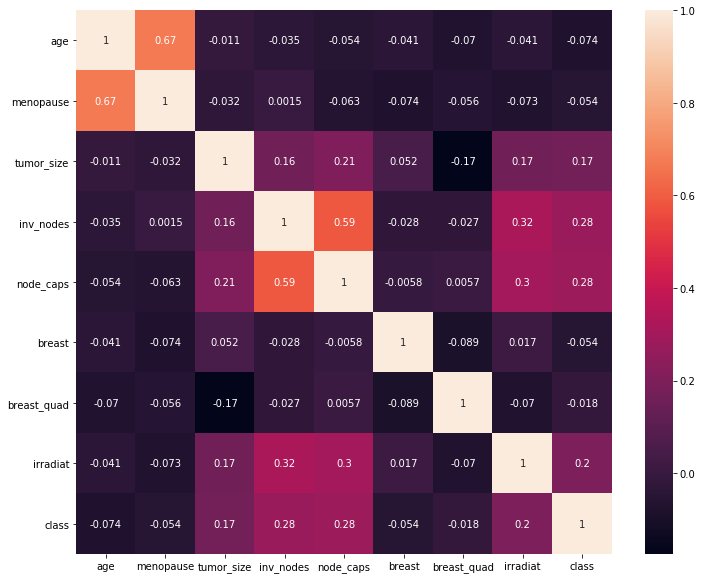

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(CleanData.corr(), annot=True)

In [22]:
CleanData.corr()['class'].sort_values(ascending=False)

class          1.000000
node_caps      0.280741
inv_nodes      0.279609
irradiat       0.197856
tumor_size     0.172998
breast_quad   -0.018365
breast        -0.053887
menopause     -0.054212
age           -0.073833
Name: class, dtype: float64

In [23]:
# karena jumlah feature yang memiliki korelasi tinggi terbatas, maka semua features akan digunakan

In [24]:
# cek outlier

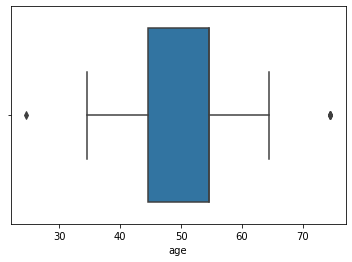

In [25]:
sns.boxplot(x="age", data=CleanData)

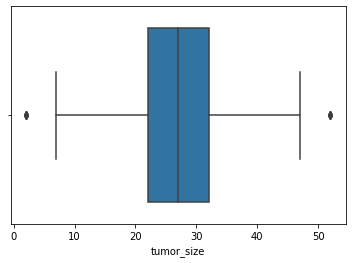

In [26]:
sns.boxplot(x="tumor_size", data=CleanData)

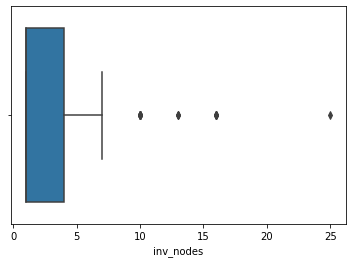

In [27]:
sns.boxplot(x="inv_nodes", data=CleanData)

In [28]:
CleanData.isna().sum()

age            0
menopause      0
tumor_size     0
inv_nodes      0
node_caps      0
deg_malig      0
breast         0
breast_quad    0
irradiat       0
class          0
dtype: int64

In [29]:
robust = RobustScaler()
robust.fit(CleanData.drop('class', axis=1))
scaled_data = robust.transform(CleanData.drop('class', axis=1))
scaled_df = pd.DataFrame(scaled_data, columns=CleanData.drop('class', axis=1).columns)
scaled_df

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,-1.0,0.0,-1.0,0.0,1.0,1.0,1.0,-0.5,0.0
1,0.0,1.0,-1.0,0.0,0.0,-1.0,1.0,1.5,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
4,-1.0,0.0,0.5,1.0,1.0,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...
280,0.0,1.0,0.5,2.0,1.0,0.0,0.0,0.0,0.0
281,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
282,-2.0,0.0,0.5,2.0,1.0,0.0,1.0,0.5,0.0
283,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
scaled_df.isna().sum()

age            0
menopause      0
tumor_size     0
inv_nodes      0
node_caps      0
deg_malig      0
breast         0
breast_quad    0
irradiat       0
class          1
dtype: int64

In [33]:
scaled_df['class'] = CleanData['class']

In [34]:
scaled_df[scaled_df.isnull().any(axis = 1)]

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,class
240,2.0,1.0,-1.5,0.0,0.0,0.0,0.0,1.5,0.0,NaN


In [35]:
scaled_df = scaled_df.dropna()

In [36]:
scaled_df[scaled_df.isnull().any(axis = 1)]

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,class


## Visualisasi Data

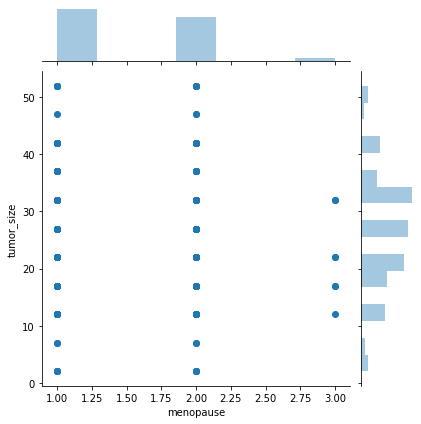

In [37]:
sns.jointplot(x='menopause', y='tumor_size', data=CleanData)


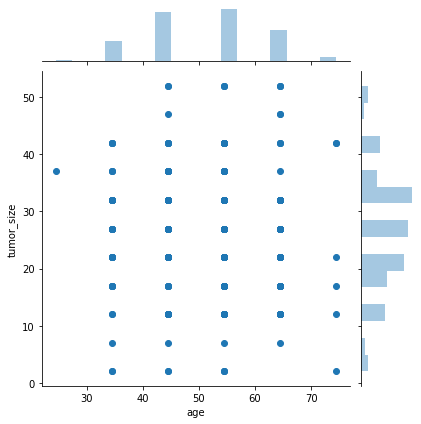

In [38]:
sns.jointplot(x='age', y='tumor_size', data=CleanData)

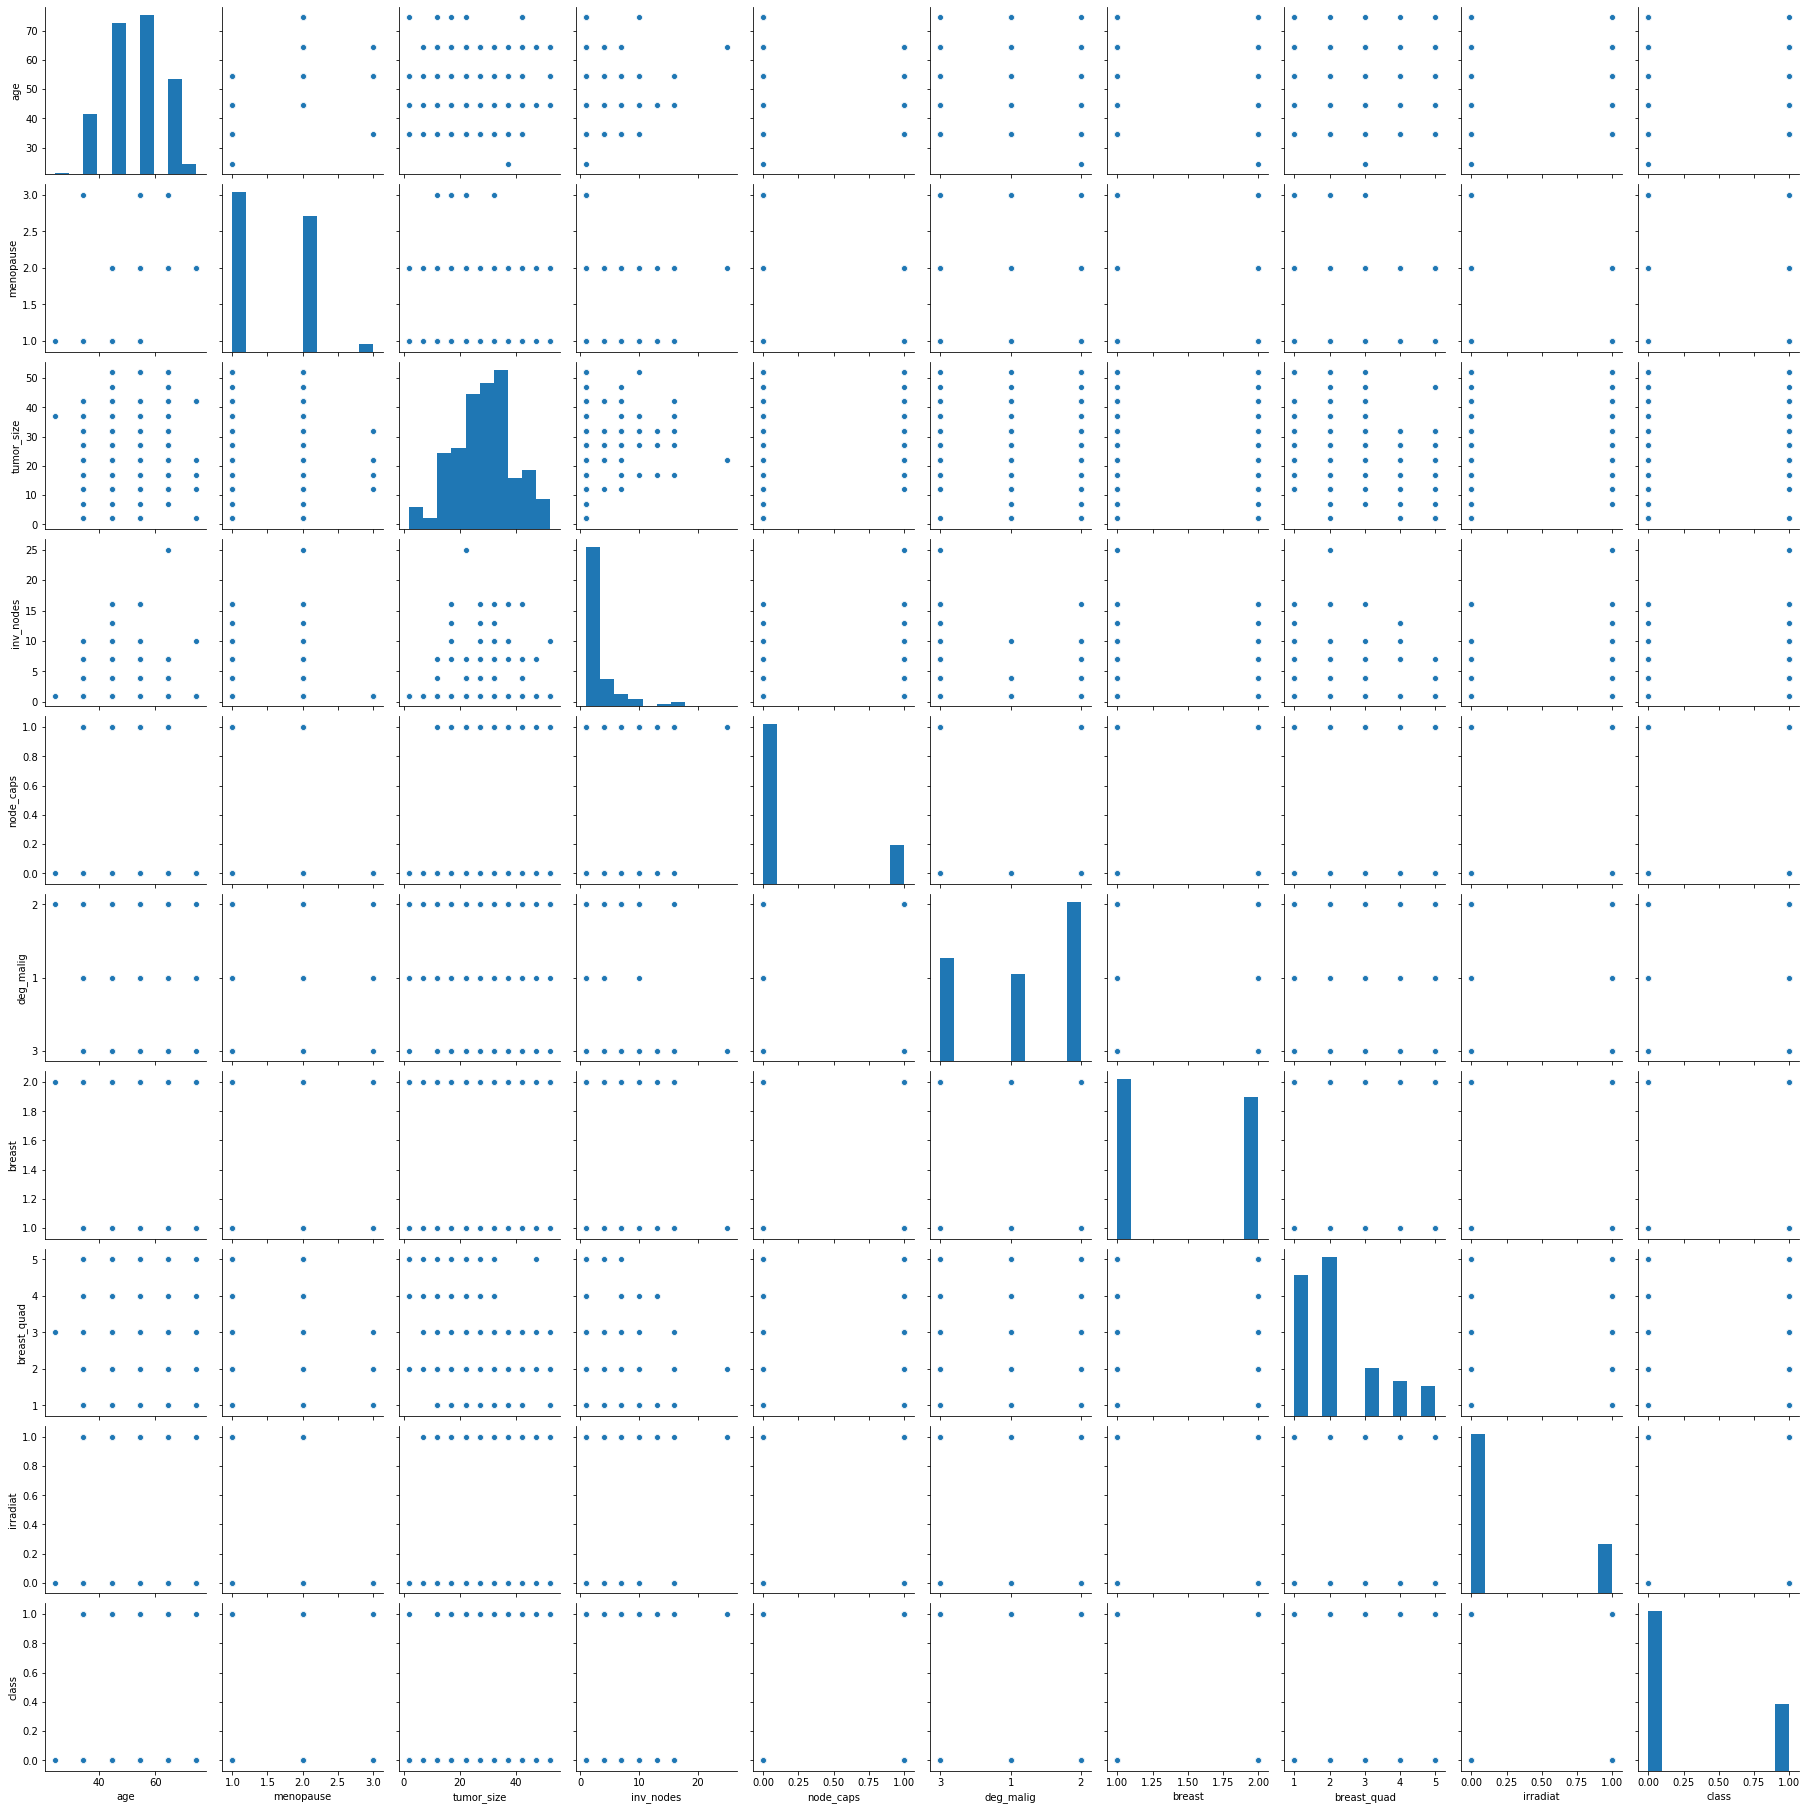

In [39]:
sns.pairplot(CleanData)

class
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

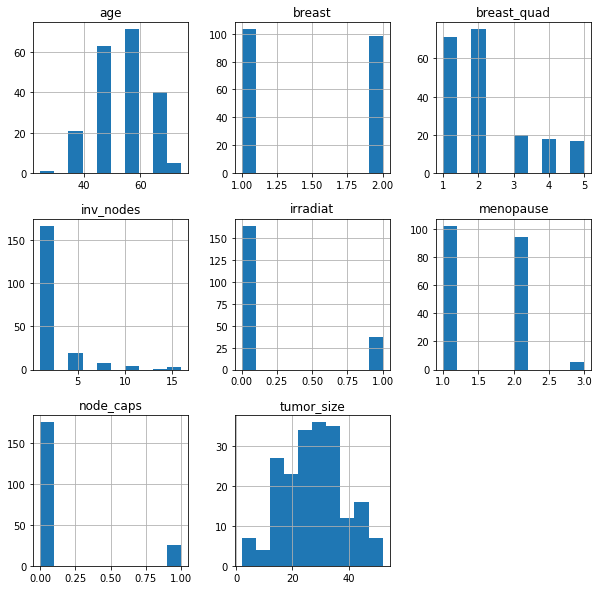

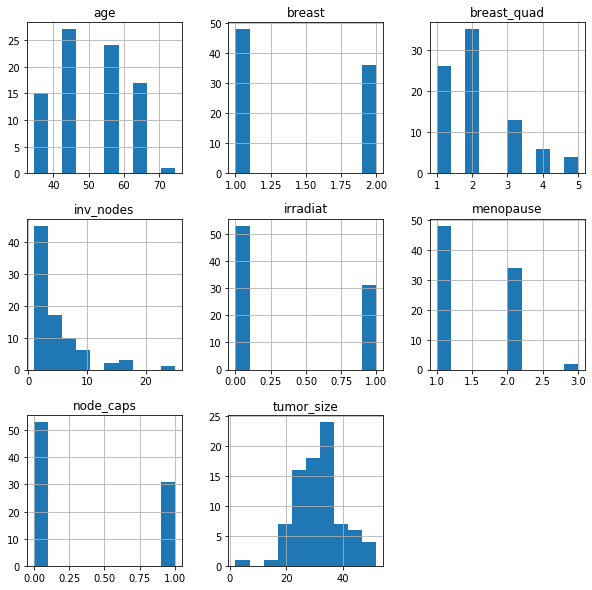

In [40]:
CleanData.groupby('class').hist(figsize=(10, 10))

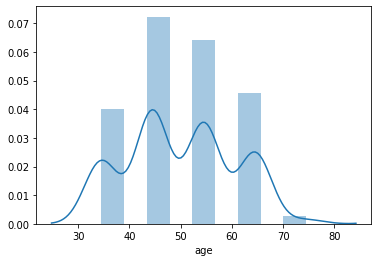

In [45]:
occur = CleanData[CleanData['class']==1]
sns.distplot(occur['age'])

# hubungan antara distribusi usia dan kemungkinan cancer kembali

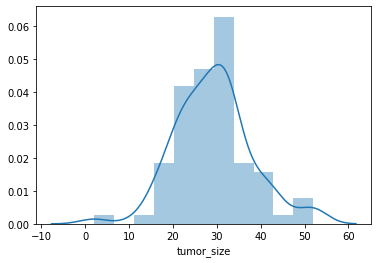

In [42]:
sns.distplot(occur['tumor_size'])

#hubungan antara distribusi size tumor dengan kemungkinan cancer kembali

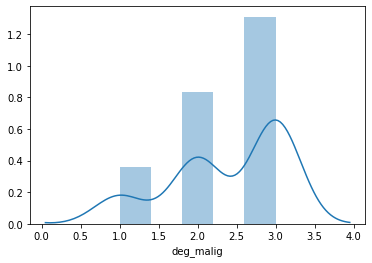

In [43]:
sns.distplot(occur['deg_malig'])

# hubungan antara distribusi degree malignancy dengan kemungkinan cancer kembali

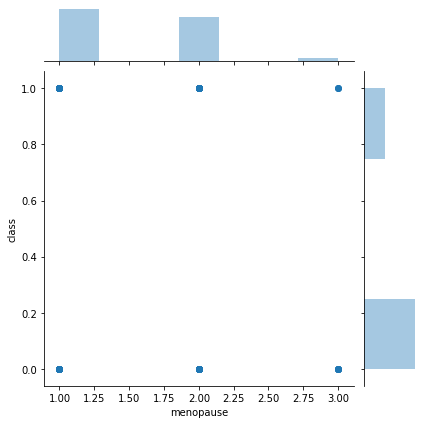

In [44]:
sns.jointplot(x='menopause', y='class', data=CleanData)

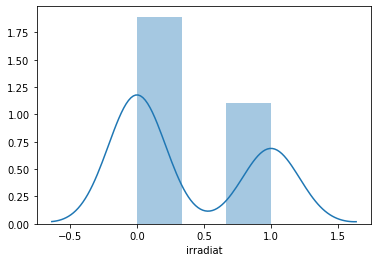

In [49]:
sns.distplot(occur['irradiat'])
#distribusi antara radiasi terapi dengan kemungkinan cancer kembali

## Train test split

In [46]:
X = scaled_df.drop('class', axis=1)
y = scaled_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=53)

In [47]:
X_train

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
226,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
151,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.5,0.0
152,0.0,1.0,1.5,1.0,1.0,0.0,0.0,0.0,0.0
225,1.0,1.0,0.5,0.0,0.0,-1.0,1.0,-0.5,0.0
146,-2.0,0.0,0.5,3.0,0.0,0.0,1.0,-0.5,1.0
...,...,...,...,...,...,...,...,...,...
186,-1.0,0.0,0.5,0.0,0.0,1.0,1.0,0.5,0.0
150,-1.0,0.0,2.5,0.0,0.0,0.0,1.0,0.0,1.0
189,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
252,2.0,1.0,-2.5,0.0,0.0,-1.0,0.0,1.0,0.0


In [48]:
y_train

226    0.0
151    0.0
152    0.0
225    0.0
146    1.0
      ... 
186    0.0
150    1.0
189    0.0
252    0.0
25     0.0
Name: class, Length: 227, dtype: float64

# Modelling

## Logistic Regression

In [50]:
lr = LogisticRegression()
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
lr_params = {
    'C': [0.1, 0.5, 0.9, 1, 2, 5],
    'penalty':['l1','l2'],
    'random_state':[24,32,56,65]
}
logreg_random = RandomizedSearchCV(estimator= lr,
                              param_distributions= lr_params,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
logreg_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 0.9, 1, 2, 5],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [24, 32, 56, 65]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=Tru

In [52]:
logreg_random.best_params_

{'random_state': 56, 'penalty': 'l2', 'C': 0.1}

In [53]:
logreg_random.best_estimator_.score(X_test, y_test)

0.7368421052631579

## Decison Tree classifier

In [54]:
dtr = DecisionTreeClassifier()
dtr

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
dtr_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,20,30,40],
    'min_samples_split': [4,5,6,7,8,9],
    'max_features': ['auto', 'sqrt', 'log2']
}
dtr_random = RandomizedSearchCV(estimator= dtr,
                              param_distributions= dtr_params,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
dtr_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [56]:
dtr_random.best_params_

{'min_samples_split': 8,
 'max_features': 'sqrt',
 'max_depth': 40,
 'criterion': 'gini'}

In [57]:
dtr_random.best_estimator_.score(X_test, y_test)

0.6666666666666666

## Random fores classifier

In [58]:
rfc = RandomForestClassifier()
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
rfc_param = {
    'bootstrap': [True, False],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [int(x) for x in np.arange(10,50,10)],
    'min_samples_split' : [int(x) for x in np.arange(2,10,1)],
    'n_estimators' : [int(x) for x in np.linspace(start=100, stop=1000, num=20)]
}

rfc_random = RandomizedSearchCV(estimator= rfc,
                              param_distributions= rfc_param,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
rfc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [60]:
rfc_random.best_params_

{'n_estimators': 715,
 'min_samples_split': 6,
 'max_depth': 40,
 'criterion': 'entropy',
 'bootstrap': True}

In [61]:
rfc_random.best_estimator_.score(X_train,y_train)

0.8766519823788547

In [62]:
best_lr = logreg_random.best_estimator_
best_dtr = dtr_random.best_estimator_
best_rfc = rfc_random.best_estimator_
scores = []
for model in [best_lr, best_dtr, best_rfc]:
    scores.append(model.score(X_train, y_train))

scores_df = pd.DataFrame({'model': ['Logistic Regression', 'Decision Tree', 'Random Forest'], 'scores': scores})
scores_df

,model,scores
0,Logistic Regression,0.731278
1,Decision Tree,0.801762
2,Random Forest,0.876652


## Logistic Regression

In [63]:
predict_lr = best_lr.predict(X_test)
proba_lr = best_lr.predict_proba(X_test)
print(classification_report(y_test, predict_lr))
print(confusion_matrix(y_test, predict_lr))

              precision    recall  f1-score   support

         0.0       0.74      0.95      0.83        39
         1.0       0.71      0.28      0.40        18

    accuracy                           0.74        57
   macro avg       0.73      0.61      0.62        57
weighted avg       0.73      0.74      0.70        57

[[37  2]
 [13  5]]


## Decision Tree

In [64]:
predict_dtr = best_dtr.predict(X_test)
proba_dtr = best_dtr.predict_proba(X_test)
print(classification_report(y_test, predict_dtr))
print(confusion_matrix(y_test, predict_dtr))

              precision    recall  f1-score   support

         0.0       0.71      0.87      0.78        39
         1.0       0.44      0.22      0.30        18

    accuracy                           0.67        57
   macro avg       0.58      0.55      0.54        57
weighted avg       0.62      0.67      0.63        57

[[34  5]
 [14  4]]


## Random Forest

In [65]:
predict_rfc = best_rfc.predict(X_test)
proba_rfc = best_rfc.predict_proba(X_test)
print(classification_report(y_test, predict_rfc))
print(confusion_matrix(y_test, predict_rfc))

              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80        39
         1.0       0.55      0.33      0.41        18

    accuracy                           0.70        57
   macro avg       0.64      0.60      0.61        57
weighted avg       0.68      0.70      0.68        57

[[34  5]
 [12  6]]


In [66]:
prob1_lr = proba_lr[:,1]
fpr_lr, tpr_lr, thres_lr = roc_curve(y_test, prob1_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

prob1_dtr = proba_dtr[:,1]
fpr_dtr, tpr_dtr, thres_dtr = roc_curve(y_test, prob1_dtr)
roc_auc_dtr = auc(fpr_dtr, tpr_dtr)

prob1_rfc = proba_rfc[:,1]
fpr_rfc, tpr_rfc, thres_rfc = roc_curve(y_test, prob1_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

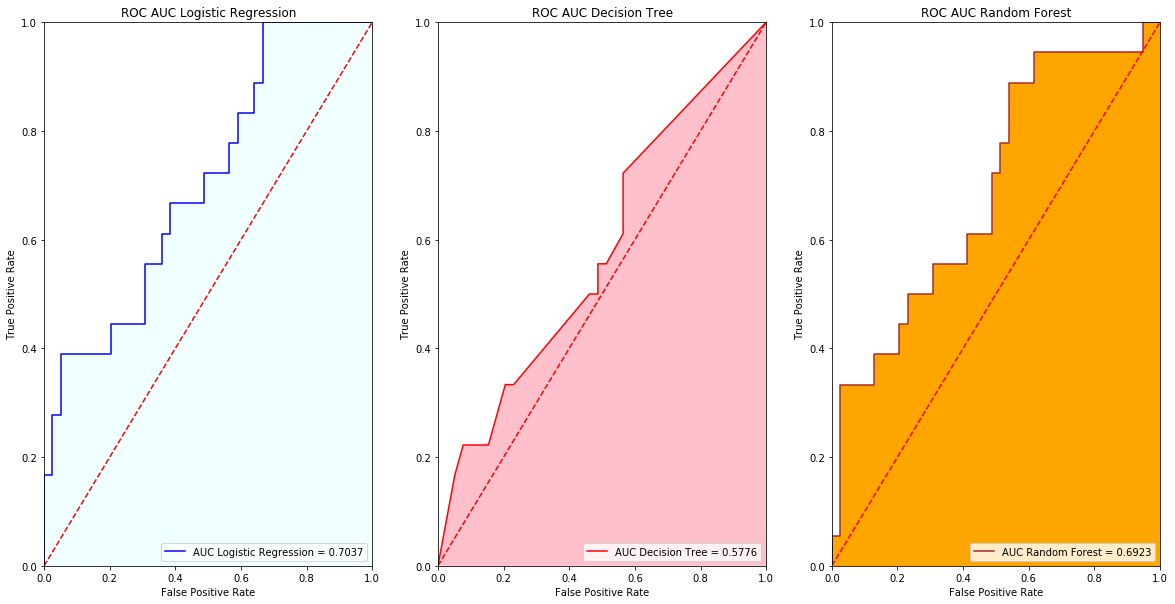

In [67]:
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title('ROC AUC Logistic Regression')
plt.plot(fpr_lr, tpr_lr, 'blue', label='AUC Logistic Regression = {}'.format(round(roc_auc_lr,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_lr,tpr_lr, 0, facecolor='azure', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(132)
plt.title('ROC AUC Decision Tree')
plt.plot(fpr_dtr, tpr_dtr, 'red', label='AUC Decision Tree = {}'.format(round(roc_auc_dtr,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtr,tpr_dtr, 0, facecolor='pink', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(133)
plt.title('ROC AUC Random Forest')
plt.plot(fpr_rfc, tpr_rfc, 'brown', label='AUC Random Forest = {}'.format(round(roc_auc_rfc,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc,tpr_rfc, 0, facecolor='orange', alpha=1)
plt.legend(loc = 'lower right')

Saya memilih mengurangi probabilitas model melakukan False Negative.
Karena tidak ingin model melakukan kesalahan untuk memprediksi pasien negative (0) namun ternyata positif recurrent atau tidak terdeteksi.


In [68]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train,y_train)

In [69]:
X_sm

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,1.000000,1.0,0.000000,0.0,0.00000,1.000000,1.0,0.000000,0.000000
1,0.000000,1.0,-1.000000,0.0,0.00000,0.000000,1.0,0.500000,0.000000
2,0.000000,1.0,1.500000,1.0,1.00000,0.000000,0.0,0.000000,0.000000
3,1.000000,1.0,0.500000,0.0,0.00000,-1.000000,1.0,-0.500000,0.000000
4,-2.000000,0.0,0.500000,3.0,0.00000,0.000000,1.0,-0.500000,1.000000
...,...,...,...,...,...,...,...,...,...
317,0.000000,2.0,-0.500000,0.0,0.00000,-1.000000,0.0,-0.070821,0.000000
318,-2.000000,0.0,-0.162979,1.0,1.00000,0.674041,0.0,0.000000,0.674041
319,0.000000,0.0,-0.779759,0.0,0.00000,0.000000,0.0,0.110121,0.000000
320,-1.000000,0.0,0.500000,1.0,0.71115,0.000000,1.0,-0.144425,0.000000


In [70]:
y_sm.value_counts()

1.0    161
0.0    161
Name: class, dtype: int64

In [71]:
lr_sm = LogisticRegression()
lr_sm.fit(X_sm, y_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
pred_lrsm = lr_sm.predict(X_test)
proba_lrsm = lr_sm.predict_proba(X_test)
print(classification_report(y_test, pred_lrsm))
print(confusion_matrix(y_test, pred_lrsm))

              precision    recall  f1-score   support

         0.0       0.76      0.64      0.69        39
         1.0       0.42      0.56      0.48        18

    accuracy                           0.61        57
   macro avg       0.59      0.60      0.59        57
weighted avg       0.65      0.61      0.63        57

[[25 14]
 [ 8 10]]


In [73]:
# compare with previous Logistic Regression model
print(classification_report(y_test, predict_lr))
print(confusion_matrix(y_test, predict_lr))

              precision    recall  f1-score   support

         0.0       0.74      0.95      0.83        39
         1.0       0.71      0.28      0.40        18

    accuracy                           0.74        57
   macro avg       0.73      0.61      0.62        57
weighted avg       0.73      0.74      0.70        57

[[37  2]
 [13  5]]


In [ ]:
# Logistic regression yang telah di-SMOTE menghasilkan acurracy lebih baik

In [74]:
proba_lrsm

array([[0.72317461, 0.27682539],
       [0.46485995, 0.53514005],
       [0.56928118, 0.43071882],
       [0.57233084, 0.42766916],
       [0.41075384, 0.58924616],
       [0.65239891, 0.34760109],
       [0.48269834, 0.51730166],
       [0.32978459, 0.67021541],
       [0.66429258, 0.33570742],
       [0.67719704, 0.32280296],
       [0.13117269, 0.86882731],
       [0.63790605, 0.36209395],
       [0.46023693, 0.53976307],
       [0.54254662, 0.45745338],
       [0.6093302 , 0.3906698 ],
       [0.71757679, 0.28242321],
       [0.40968456, 0.59031544],
       [0.26537684, 0.73462316],
       [0.76529167, 0.23470833],
       [0.18313966, 0.81686034],
       [0.51254135, 0.48745865],
       [0.09675149, 0.90324851],
       [0.24709616, 0.75290384],
       [0.52900798, 0.47099202],
       [0.4136129 , 0.5863871 ],
       [0.41386065, 0.58613935],
       [0.21526173, 0.78473827],
       [0.60480529, 0.39519471],
       [0.67659744, 0.32340256],
       [0.54237879, 0.45762121],
       [0.

In [75]:
from sklearn.metrics import precision_score, recall_score
threshold = [0.5, 0.55, 0.65, 0.7, 0.75]
precision = []
recall = []
for thres in threshold:
    pred = []
    for prob in proba_lrsm[:,1]:
        if prob>thres:
            pred.append(1)
        else:
            pred.append(0)
    precision.append(round(precision_score(y_test, pred, pos_label=0),5))
    recall.append(round(recall_score(y_test, pred, pos_label=1),5))

In [76]:
print(threshold)
print(precision)
print(recall)

[0.5, 0.55, 0.65, 0.7, 0.75]
[0.75758, 0.77778, 0.76744, 0.76596, 0.7551]
[0.55556, 0.55556, 0.44444, 0.38889, 0.33333]


In [77]:
print(classification_report(y_test, pred_lrsm))
print(confusion_matrix(y_test, pred_lrsm))

              precision    recall  f1-score   support

         0.0       0.76      0.64      0.69        39
         1.0       0.42      0.56      0.48        18

    accuracy                           0.61        57
   macro avg       0.59      0.60      0.59        57
weighted avg       0.65      0.61      0.63        57

[[25 14]
 [ 8 10]]


In [78]:
thres_df = pd.DataFrame({'threshold': threshold, 'precision-': precision, 'recall+': recall})
thres_df

,threshold,precision-,recall+
0,0.50,0.75758,0.55556
1,0.55,0.77778,0.55556
2,0.65,0.76744,0.44444
3,0.70,0.76596,0.38889
4,0.75,0.75510,0.33333


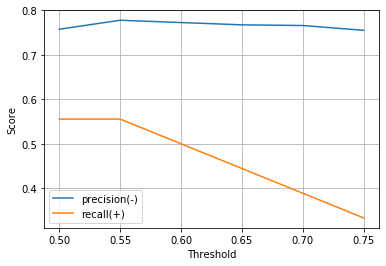

In [79]:
plt.plot(thres_df['threshold'], thres_df['precision-'], label='precision(-)')
plt.plot(thres_df['threshold'], thres_df['recall+'], label='recall(+)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# best threshold 0.55

In [80]:
X_sm.columns

Index(['age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps', 'deg_malig',
       'breast', 'breast_quad', 'irradiat'],
      dtype='object')

In [81]:
scaled_df.columns

Index(['age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps', 'deg_malig',
       'breast', 'breast_quad', 'irradiat', 'class'],
      dtype='object')

In [82]:
neww = CleanData[['age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps',
       'deg_malig', 'breast', 'breast_quad', 'irradiat']]
# after that, scale it
scaled_data = robust.transform(neww)
scaled = pd.DataFrame(scaled_data, columns=X_sm.columns)
scaled

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,-1.0,0.0,-1.0,0.0,1.0,1.0,1.0,-0.5,0.0
1,0.0,1.0,-1.0,0.0,0.0,-1.0,1.0,1.5,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
4,-1.0,0.0,0.5,1.0,1.0,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...
280,0.0,1.0,0.5,2.0,1.0,0.0,0.0,0.0,0.0
281,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
282,-2.0,0.0,0.5,2.0,1.0,0.0,1.0,0.5,0.0
283,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [84]:
neww['class'] = lr_sm.predict(scaled)
neww

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,class
0,44.5,1,17,1,1,3,2,1.0,0,1.0
1,54.5,2,17,1,0,1,2,5.0,0,0.0
2,54.5,2,37,1,0,2,1,2.0,0,0.0
3,44.5,1,37,1,1,3,2,2.0,1,1.0
4,44.5,1,32,4,1,2,1,3.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
281,54.5,2,32,7,1,2,1,2.0,0,1.0
282,54.5,1,27,4,1,2,1,2.0,1,1.0
283,34.5,1,32,7,1,2,2,3.0,0,1.0
284,54.5,1,17,1,0,2,2,2.0,0,0.0


## PCA

In [85]:
from sklearn.decomposition import PCA

In [86]:
X = scaled_df.drop('class', axis=1)
y = scaled_df['class']

In [87]:
pca = PCA(n_components=2)

In [88]:
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [89]:
x_pca = pca.transform(scaled_df)

In [90]:
scaled_df.shape

(284, 10)

In [91]:
x_pca.shape

(284, 2)

In [92]:
x_pca

array([[-2.09086525e-01, -9.34956711e-01],
       [-1.38968678e+00,  2.29428223e-01],
       [ 8.47830903e-03,  6.39755058e-01],
       [ 6.44559336e-01, -6.84229076e-01],
       [ 8.88075348e-01, -7.04863632e-01],
       [ 4.14748931e-01,  1.99932082e-01],
       [ 4.28305419e-01,  7.39119681e-01],
       [-1.05961983e+00, -9.61013712e-01],
       [-1.57926084e+00, -1.25601855e+00],
       [ 4.50072437e+00,  1.31625868e-01],
       [-5.28272297e-01,  1.17686855e-01],
       [-1.08508664e+00,  1.28693658e+00],
       [-7.30006605e-01,  4.46476222e-01],
       [-5.42211053e-01,  5.26196798e-01],
       [-1.61819944e-01, -7.95241481e-01],
       [-3.11006010e-01, -1.91997067e+00],
       [-6.82984675e-01,  7.14456238e-03],
       [-1.08508664e+00,  1.28693658e+00],
       [ 1.56651717e-01,  3.78520740e-01],
       [-4.51268148e-01,  4.49722348e-01],
       [-9.92975342e-01,  8.29453261e-01],
       [ 9.36280417e-01,  1.70609111e+00],
       [-1.00724168e+00,  3.37712247e-01],
       [-1.

In [93]:
dfpca = pd.DataFrame(x_pca)
dfpca['class'] = scaled_df['class']
dfpca.head()

,0,1,class
0,-0.209087,-0.934957,1.0
1,-1.389687,0.229428,0.0
2,0.008478,0.639755,1.0
3,0.644559,-0.684229,0.0
4,0.888075,-0.704864,1.0


In [94]:
for c in dfpca.columns[0:2]:
    dfpca.rename({int(c): f'PC{int(c)+1}'}, axis=1,inplace=True)

In [95]:
dfpca

,PC1,PC2,class
0,-0.209087,-0.934957,1.0
1,-1.389687,0.229428,0.0
2,0.008478,0.639755,1.0
3,0.644559,-0.684229,0.0
4,0.888075,-0.704864,1.0
...,...,...,...
279,1.433707,0.692931,0.0
280,0.589653,0.177128,0.0
281,1.645578,-1.564353,0.0
282,-0.972182,-0.045960,0.0


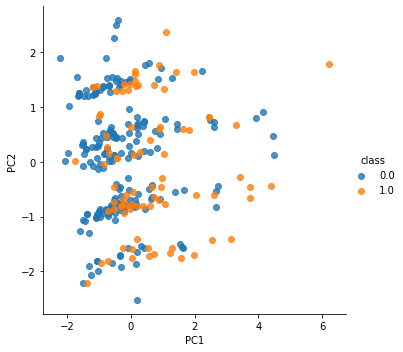

In [96]:
sns.lmplot(x='PC1', y='PC2', hue='class', data=dfpca, fit_reg=False)

In [97]:
pca.components_

array([[-0.1030888 , -0.03505989,  0.43978678,  0.79056026,  0.19602532,
         0.30671359, -0.00412271, -0.05048768,  0.13133984,  0.13202371],
       [ 0.90543845,  0.38367257,  0.14469867,  0.0585947 ,  0.00203285,
        -0.02307363, -0.01894851, -0.08757177, -0.00118685, -0.00630304]])

In [98]:
sum(pca.explained_variance_)

2.8454341506398206

In [99]:
dfpca['class'].value_counts()

0.0    199
1.0     84
Name: class, dtype: int64

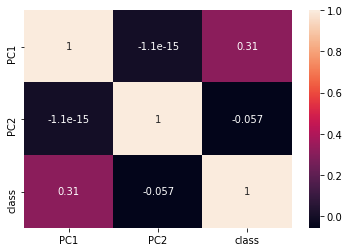

In [100]:
sns.heatmap(dfpca.corr(), annot=True)

## Overview

Tingkat akurasi model machine learning masih cukup rendah untuk dapat diandalkan dalam memprediksi apakah selkanker akan kembali kambuh atau tidak, dikarenakan keterbatasan dalam dataset.

Karena beberapa feature seperti usia dan ukuran tumor tidak diberikan dalam bentuk data numerik langsung sehingga memerlukan perubahan yang mengakibatkan kehilangan informasi yang penting.

Dataset juga tidak mencakup semua faktor risiko kanker muncul kembali seperti riwayat keluarga mutasi genetik, ketersediaan metrik ini akan meningkatkan skor akurasi prediksi.

Dataset tidak mengandung rincian mengenai inti dari sel kanker: misalnya. (luas, tekstur,bentuk dll).

Machine learning algorithm dapat digunakan untuk mendeteksi secara dini kejadian kanker payudara, namun mengingat algoritma ini memerlukan variabel input analitik dan tidak bergantung pada gejala kanker yang sebenarnya, maka cukup dapat digunakan untuk meningkatkan kemungkinan hidup pasien.

Sayangnya karena keterbatasan dataset, akurasi prediksi model maksimum 70%. Risiko dengan skor akurasi yang rendah adalah jumlah FP - False Positive (wanita dengan peristiwa kanker kambuh kembali yang dites negatif) yang mungkin tidak terdeteksi.


PCA tidak dapat memisahkan dua kelas antara recurrent (1) dengan yang tidak (0).

Dari plot PCA, maka saya berasumsi Logistic Regression sebelumnya masih lebih baik dari PCA.